## importing required libraries

In [14]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sqlite3    ## SQL Interface
import pickle     ## Used to save your data - Converts objects to byte stream and vice versa


## Modules to perform Text Preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.metrics import confusion_matrix


from sklearn.naive_bayes import BernoulliNB 
from sklearn.naive_bayes import MultinomialNB 

import gensim    ## To build Word2Vec model

## reading the data from final.sqlite file

In [3]:
con=sqlite3.connect("final.sqlite")
final=pd.read_sql_query("select * from Spam",con)
con.close()

In [4]:
final

,text,class,cleaned_text
0,"> deat : sun , 15 dec 91 2 : 25 : 2 est > : mi...",0.0,deat sun dec est michael subject queri wlodek ...
1,"discussion s - > np + np remind ago read , sou...",0.0,discuss remind ago read sourc forget critiqu n...
2,". . . 's much restrictive s - > np np . 's "" ""...",0.0,much restrict pro quit
3,""" listserv "" international conference 1992 sec...",0.0,listserv intern confer second circular februar...
4,anyone point book article causative constructi...,0.0,anyon point book articl causat construct korea...
5,graduate student education approach colleague ...,0.0,graduat student educ approach colleagu mine qu...
6,undergraduate course shortly teach psycholingu...,0.0,undergradu cours short teach psycholinguist ap...
7,on-line corpus modern german . information app...,0.0,corpus modern german inform appreci ken beesle...
8,"hi , help ! design experiment mandarin tone pa...",0.0,help design experi mandarin tone part phonolog...
9,linguistic program university utah invite appl...,0.0,linguist program univers utah invit applic vis...


## performing binary BOW on cleaned text column

In [8]:
bow_vect=CountVectorizer(binary=True)
bow=bow_vect.fit_transform(final["cleaned_text"].values)

In [9]:
X=bow

In [10]:
X

<962x18944 sparse matrix of type '<class 'numpy.int64'>'
	with 134256 stored elements in Compressed Sparse Row format>

## separating the class values

In [11]:
Y=final["class"].values

In [12]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## splitting the data for testing and training 

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

## performing cross validation to find optimum value of alpha

In [28]:
alpha=np.linspace(0.1,1,10)
cv_scores=[]
for a in alpha:
    clf=BernoulliNB(alpha=a)
    scores=cross_val_score(clf,X_train,Y_train,cv=10,scoring="accuracy")
    cv_scores.append(scores.mean())
MSE=[1-x for x in cv_scores]
optimal_alpha=alpha[MSE.index(min(MSE))]

In [29]:
optimal_alpha

0.1

In [30]:
alpha

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

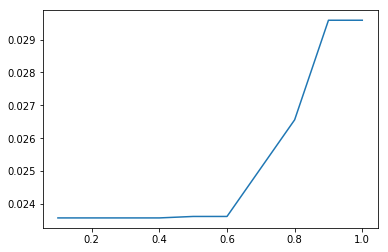

In [31]:
plt.plot(alpha,MSE)


### training the BernoulliNB model with the found optimum alpha value and testing the model to find accuracy and confusion matrix

In [32]:
clf=BernoulliNB(alpha=optimal_alpha)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
acc=accuracy_score(Y_test,y_pred,normalize=True)*float(100)
print(acc)
confusion_matrix(Y_test,y_pred).T

98.96193771626297


array([[153,   1],
       [  2, 133]], dtype=int64)

In [33]:
from sklearn.metrics import f1_score


In [35]:
f1_score(Y_test, y_pred) 

0.9888475836431226

In [39]:
f1_score(Y_test, y_pred, average='micro') 

0.9896193771626297

In [41]:
f1_score(Y_test, y_pred, average=None) 

array([0.99029126, 0.98884758])